# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 54 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.stats import multivariate_normal
from itertools import count
import time
class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, k, random_state=None, eps=1e-2, max_steps = 100):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.random_state = random_state
        self.eps = eps
        self.max_steps =max_steps
        return
        
    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(X)
        #Initialize starter parameteres - mu, pi, sigma
        np.random.seed(self.random_state)
        self.mu = [X[np.random.randint(0, X.shape[0])]]
        for i in range(1, self.k):
            cumsum = np.cumsum(ss.distance.cdist(X, self.mu, metric='sqeuclidean').min(axis=1))
            index = (cumsum >= np.random.random() * cumsum[-1]).tolist().index(True)
            self.mu.append(X[index])    
        self.mu = np.array(self.mu)
        self.sigma = np.array([np.eye(len(X[0])) for i in range(self.k)])
        self.pi = np.ones(self.k) / self.k
        self.gamma= np.zeros((self.k, self.x_len))
        
        likilihood_previous = 0
        for step in count(1):
            #E step
            for j in range(self.k):
                self.gamma[j, :] = self.pi[j] * multivariate_normal.pdf(X, allow_singular=True, mean = self.mu[j], cov = self.sigma[j])
            gamma_sum = np.sum(self.gamma, axis = 0)
            self.gamma = self.gamma / gamma_sum
            if (step>self.max_steps):
                return self
            likilihood = np.sum(np.array(gamma_sum))
            if (abs(likilihood - likilihood) < self.eps):
                return self
            likilihood_previous = likilihood
            #M step
            N = np.sum(self.gamma, axis = 1)
            self.mu = np.dot(self.gamma[:], X) / N[:, None]
            self.pi = N[:,None] / self.x_len
            for i in range(self.k):
                for j in range(len(X)):
                    self.sigma[i]+= gamma[i,j] * np.outer(X[j] - self.mu[i], X[j] - self.mu[i])
                self.sigma[i] = self.sigma[i] / N[i]
            
            return self
    
    
    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        y = np.array([np.argmax([self.pi[i] * multivariate_normal.pdf(X[j], allow_singular=True, mean = self.mu[i], cov = self.sigma[i]) for i in range(self.k)])
                     for j in range(len(X))] )
        return y
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

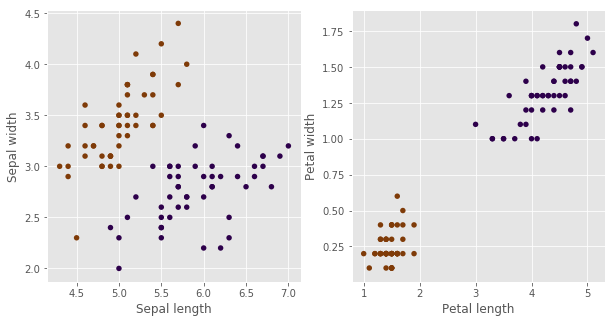

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [6]:
pred_iris =  Clustering(k=2, random_state=100).fit_predict(x_iris)

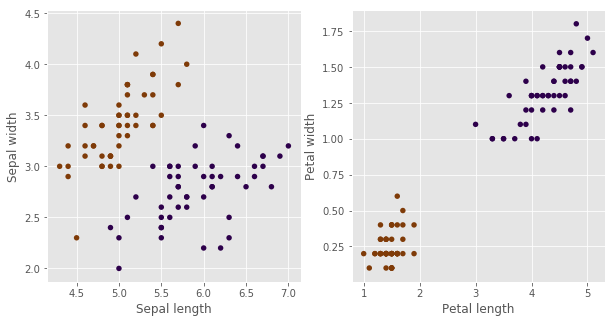

In [7]:
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [8]:
pred_iris = Clustering(k=2,random_state=100).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
%%timeit

GaussianMixture(n_components=2,random_state=100).fit(x_iris).predict(x_iris)

The slowest run took 83.38 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 2.92 ms per loop


In [11]:
%%timeit

Clustering(2,random_state=100).fit_predict(x_iris)

10 loops, best of 3: 29.6 ms per loop


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [12]:
## Задание 2
def inertia(x, y):
    """
    Implement quality criterion of your choice
    """
    dist = 0
    X = np.array(x)
    X -= X.mean(axis=0)
    X /= X.std(axis=0)
    for label in range(y.max() + 1):
        cluster = X[y == label]
        if cluster.shape[0] > 0:
            dist += ((cluster - cluster.mean(axis=0)) ** 2).mean()
    return dist

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

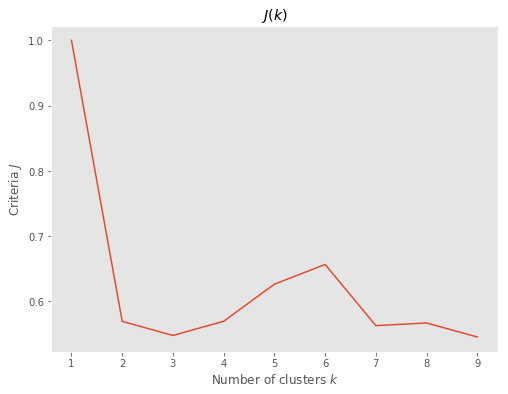

In [13]:
ks = range(1, 10)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    y = Clustering(k, random_state = 100).fit_predict(x_iris)
    criteria[i] = inertia(x_iris, y)
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Таким образом, из графика получаем, что оптимальное количество кластеров 2-3.

## Задание 3
Применить алгоритм кластеризации к данным по странам.
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.
Также необходимо показать, какие страны попали в общий кластер. изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

In [14]:
countries_all_years = pd.read_csv("WDIData.csv")
countries = countries_all_years[['Country Name','Indicator Name','2005']]
countries = countries.dropna(axis=0)
df = countries['2005'].groupby([countries['Country Name'],countries['Indicator Name']]).sum().unstack()
#Заменим Nan на средее
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace = True)
df.head()

Indicator Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),...,Wholesale price index (2010 = 100),"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,15.132160,16.709670,58.173913,20.992827,23.000000,13.000000,74.000000,31.32692,25.923962,13.9744,...,79.959403,45.3,44.452941,28.45625,19.053333,32.111765,35.541176,23.929412,23.515385,27.968532
Albania,43.639880,55.653665,45.000000,55.082330,100.000000,100.000000,100.000000,31.32692,25.923962,13.9744,...,91.322206,45.3,29.800000,8.70000,3.100000,17.000000,19.600000,8.700000,7.500000,29.740675
Algeria,31.807370,38.739440,58.173913,97.478508,98.184265,96.547516,88.003875,31.32692,25.923962,13.9744,...,81.314684,45.3,44.452941,28.45625,19.053333,32.111765,35.541176,23.929412,23.515385,41.619359
American Samoa,212.144369,249.743743,58.173913,59.062784,76.361676,69.556613,88.003875,31.32692,25.923962,13.9744,...,79.959403,45.3,44.452941,28.45625,19.053333,32.111765,35.541176,23.929412,23.515385,41.126130
Andorra,212.144369,249.743743,58.173913,100.000000,100.000000,100.000000,100.000000,31.32692,25.923962,13.9744,...,79.959403,45.3,44.452941,28.45625,19.053333,32.111765,35.541176,23.929412,23.515385,41.126130


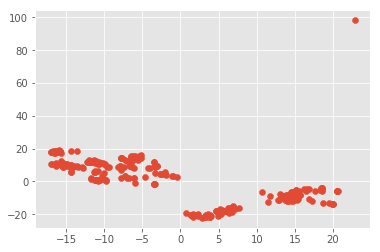

In [15]:
from sklearn.manifold import TSNE
arr = np.array(df)
arrtsne = TSNE(n_components= 2,random_state=10).fit_transform(arr)
plt.scatter(arrtsne[:, 0], arrtsne[:, 1])

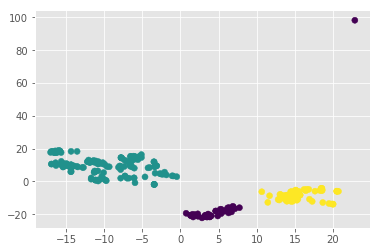

In [16]:
np.seterr(divide='ignore', invalid='ignore')
y = Clustering(k = 3, random_state = 3).fit_predict(arrtsne)
plt.scatter(arrtsne[:, 0], arrtsne[:, 1], c = y)

In [ ]:
## Задание 4

In [17]:
names = np.array(list(df.axes[0]))
clust = [[] for i in range(len(np.unique(y)))]

In [18]:
for i in range(len(y)):
    clust[y[i]].append(names[i])

In [19]:
clust

[['Afghanistan',
  'Andorra',
  'Angola',
  'Aruba',
  'Bahrain',
  'Bermuda',
  'Bosnia and Herzegovina',
  'Cabo Verde',
  'Central African Republic',
  'Channel Islands',
  "Cote d'Ivoire",
  'Ethiopia',
  'Faroe Islands',
  'Fiji',
  'Georgia',
  'Ghana',
  'Grenada',
  'Guinea',
  'Guyana',
  'Indonesia',
  'Isle of Man',
  'Jamaica',
  'Kiribati',
  'Kosovo',
  'Kuwait',
  'Liechtenstein',
  'Maldives',
  'Marshall Islands',
  'Micronesia, Fed. Sts.',
  'Monaco',
  'Montenegro',
  'Myanmar',
  'Niger',
  'Palau',
  'Papua New Guinea',
  'San Marino',
  'Sao Tome and Principe',
  'Seychelles',
  'Solomon Islands',
  'St. Kitts and Nevis',
  'St. Lucia',
  'St. Vincent and the Grenadines',
  'Suriname',
  'Tonga',
  'Tuvalu',
  'Yemen, Rep.'],
 ['Albania',
  'Algeria',
  'American Samoa',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas, The',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  

Таким обрзом получаем: первый кластер - неразвитые страны, второй кластер - развитые страны(относительно первых), третий кластер - обобщенные территориии, не относятся ни к первому, ни к второму кластеру.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.